\begin{center}
Gabe Morris
\end{center}

In [1]:
import numpy as np
from eng_analysis import jacobi, newton_raphson, downhill, gauss_solve
import sympy as sp
from scipy.integrate import quadrature, AccuracyWarning
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore', category=AccuracyWarning)

plt.style.use('../maroon_ipynb.mplstyle')

[Package Contents](https://github.com/gabemorris12/eng_analysis)

\pagebreak
\tableofcontents
\pagebreak

\begin{center}
\begin{tabular}{ccc}
ME 8213 & Final Exam & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

# Problem 1
Find the value of $z$ such that the smallest eigenvalue of the following matrix is 1.

$$
\left[\begin{array}{llllll}
z & 4 & 3 & 5 & 2 & 1 \\
4 & z & 2 & 4 & 3 & 4 \\
3 & 2 & z & 4 & 1 & 8 \\
5 & 4 & 4 & z & 2 & 5 \\
2 & 3 & 1 & 2 & z & 3 \\
1 & 4 & 8 & 5 & 3 & z
\end{array}\right]
$$

## Solution
We have functions that can get the eigenvalues of a matrix, so we can make a function finds the minimum eigenvalue at $z$ and returns $1 - \lambda_{min}$ to be used by the newton-rasphson method.

In [2]:
def find_min(z):
    z = z[0]
    A_ = np.array([
        [z , 4 , 3 , 5 , 2 , 1],
        [4 , z , 2 , 4 , 3 , 4],
        [3 , 2 , z , 4 , 1 , 8],
        [5 , 4 , 4 , z , 2 , 5],
        [2 , 3 , 1 , 2 , z , 3],
        [1 , 4 , 8 , 5 , 3 , z]
    ], dtype=np.float64)
    
    lam = min(jacobi(A_)[0])
    return np.array([1 - lam, ])


min_lam = newton_raphson(find_min, np.array([3, ]))[0]
min_lam

10.19025092584565

\pagebreak

\begin{center}
\begin{tabular}{ccc}
ME 8213 & Final Exam & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

# Problem 2

![Figure 1](f1.png)

The truss system above results in the following equations for the displacements of $u$ and $v$:

$$
\frac{E}{4 L}\left[\begin{array}{cc}
3 A_1+3 A_3 & \sqrt{3} A_1+\sqrt{3} A_3 \\
\sqrt{3} A_1+\sqrt{3} A_3 & A_1+8 A_2+A_3
\end{array}\right]\left[\begin{array}{l}
u \\
v
\end{array}\right]=\left[\begin{array}{c}
P \\
2 P
\end{array}\right]
$$

where $E$ is the elastic modulus, $A_i$ is the cross-sectional area of member $i$, and $P$ is an applied load. If $A_1=A_3$, find the cross-sectional areas that minimize the structural volume assuming $u$ and $v$ cannot exceed some critical displacement $\delta$. What is the minimum volume? Your answer will be in terms of $E$, $L$, $P$, and $\delta$.

## Solution
Like Example 10.5 in the book, it is best to re-write the equations by introducing dimensionless variables.

$$x_i=\frac{E\delta}{PL}A_i \hspace{0.5in} u'=\frac{u}{\delta} \hspace{0.5in} v'=\frac{v}{\delta}$$

The analysis below will show the result of making these substitutions.

In [3]:
E, L, P, u, v = sp.symbols('E L P u v')
A1, A2, A3 = sp.symbols('A1:4')

A = sp.Matrix([
    [3*A1 + 3*A3, sp.sqrt(3)*A1 + sp.sqrt(3)*A3],
    [sp.sqrt(3)*A1 + sp.sqrt(3)*A3, A1 + 8*A2 + A3]
])

eq = sp.Eq(
    E/(4*L)*sp.MatMul(A, sp.Matrix([u, v])),
    sp.Matrix([P, 2*P])
)
eq

Eq((E/(4*L))*Matrix([
[   u*(3*A1 + 3*A3) + v*(sqrt(3)*A1 + sqrt(3)*A3)],
[u*(sqrt(3)*A1 + sqrt(3)*A3) + v*(A1 + 8*A2 + A3)]]), Matrix([
[  P],
[2*P]]))

In [4]:
u_p, v_p, d = sp.symbols(r"u' v' \delta")
x1, x2 = sp.symbols('x1:3')

eq_subs = eq.subs([
    (A3, A1),
    (A1, x1*P*L/(E*d)),
    (A2, x2*P*L/(E*d)),
    (u, u_p*d),
    (v, v_p*d)
]).expand()
eq_subs

Eq(Matrix([
[          3*P*u'*x1/2 + sqrt(3)*P*v'*x1/2],
[sqrt(3)*P*u'*x1/2 + P*v'*x1/2 + 2*P*v'*x2]]), Matrix([
[  P],
[2*P]]))

In [5]:
eq1 = sp.Eq((eq_subs.lhs[0]/P).simplify(), (eq_subs.rhs[0]/P).simplify())
eq2 = sp.Eq((eq_subs.lhs[1]/P).simplify(), (eq_subs.rhs[1]/P).simplify())
display(eq1, eq2)

Eq(x1*(3*u' + sqrt(3)*v')/2, 1)

Eq(sqrt(3)*u'*x1/2 + v'*x1/2 + 2*v'*x2, 2)

In [6]:
A, b = sp.linear_eq_to_matrix([eq1, eq2], [u_p, v_p])
display(A, b)

Matrix([
[      3*x1/2, sqrt(3)*x1/2],
[sqrt(3)*x1/2,  x1/2 + 2*x2]])

Matrix([
[1],
[2]])

The above equation can be simplified further by scaling into

$$
\left[\begin{array}{cc}
6 x_1 & 2 \sqrt{3} x_1 \\
2 \sqrt{3} x_1 & 2 x_1+8 x_2
\end{array}\right]\left[\begin{array}{l}
u^{\prime} \\
v^{\prime}
\end{array}\right]=\left[\begin{array}{l}
4 \\
8
\end{array}\right]
$$

The volume of each member shown in the figure is determined by the product between the cross-sectional area and the length.

In [7]:
V = A1*2*L + A2*sp.Rational(1, 2)*L
V

2*A1*L + A2*L/2

In [8]:
V.subs([
    (A1, x1*P*L/(E*d)),
    (A2, x2*P*L/(E*d))
]).simplify()

L**2*P*(4*x1 + x2)/(2*E*\delta)

$$V=A_1\cdot2L + A_2\cdot\frac{1}{2}L=\frac{PL^2}{2E\delta}(4x_1+x_2)$$

The volume can then be minimized by using the downhill simplex method, and we can use $u'\le1$ and $v'\le1$ as the bounds.

In [9]:
def vol(x_): return 4*x_[0] + x_[1]

b = [4, 8]

def get_displacement(x_):
    a_ = [
        [6*x_[0], 2*np.sqrt(3)*x_[0]],
        [2*np.sqrt(3)*x_[0], 2*x_[0] + 8*x_[1]]
    ]
    return gauss_solve(a_, b)

def func(x_):
    u_, v_ = get_displacement(x_)
    c1 = max(0, u_ - 1)
    c2 = max(0, v_ - 1)
    return vol(x_) + 10_000*(c1**2 + c2**2)

x1_, x2_ = downhill(func, np.float64([1, 1]))[0]
x1_, x2_  # unit-less

(0.42262539975856195, 0.7112781424804177)

This would make the areas that minimize the volume equal to:

In [10]:
A1_ = P*L/(E*d)*x1_
A2_ = P*L/(E*d)*x2_
display(A1_.n(5), A2_.n(5))

0.42263*L*P/(E*\delta)

0.71128*L*P/(E*\delta)

This would make the minimum volume equal to the following:

In [11]:
V.subs([
    (A1, A1_),
    (A2, A2_)
]).simplify().n(5)

1.2009*L**2*P/(E*\delta)

\pagebreak

\begin{center}
\begin{tabular}{ccc}
ME 8213 & Final Exam & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

# Problem 3
Consider a roller coaster car starting from rest sliding down a parabolic track. The height of the track, $y$, as a function of distance from the starting location, $x$, is given by $y=ax^2+bx$. If the destination for the car is 10 m below the starting point and 10 m away, find the value of $a$ (the curvature of the parabola) that minimizes the travel time. What is the total travel time? Assume the force of gravity is $g=10\,m/s^2$. Be sure to consider the accuracy of your answer and provide some discussion of that accuracy. Hint: The travel time is given by the integral $\int \frac{ds}{v}$ where $s$ is the arc along which the car travels and $v$ is the instantaneous velocity that depends on the current height of the car relative to its origin: $v=\sqrt{-2gy}$.

![Figure 2](f2.png)

## Solution
The above relationship for the velocity as a function of $y$ comes from the conservation of energy. We also know that by breaking down the curve into differentials, we have

$$ds=\sqrt{1+\left(\frac{dy}{dx}\right)^2}dx$$

which comes from incorporating the Pythagorean Theorem. It is also true that y(10)=-10, which is an added constraint. With these known expressions, we can substitute them to get a function for the travel time expressed in terms of $a$ and $b$.

In [12]:
a, b, g, x = sp.symbols('a b g x')

y = a*x**2 + b*x
# v = sp.sqrt(2*g*y)
v = sp.sqrt(-2*g*y)
ds = sp.sqrt(1 + y.diff(x)**2)
t = sp.Integral(ds/v, (x, 0, 10))
t

Integral(sqrt(2)*sqrt((2*a*x + b)**2 + 1)/(2*sqrt(-g*(a*x**2 + b*x))), (x, 0, 10))

In [13]:
# Constraint
eq = sp.Eq(-10, y.subs(x, 10))
eq

Eq(-10, 100*a + 10*b)

This integral cannot be determined analytically, so numerical methods like the quadrature methods can be used to determine the time travelled at some value of $a$ and $b$. Since we now have a function of one variable, the easiest way to optimize is to use the numerical derivative and set it equal to zero, then use the Newton-Raphson method to minimize. The below code cell does this.

In [14]:
integrand = lambda x_, a_, b_: np.sqrt(2)*np.sqrt((2*a_*x_ + b_)**2 + 1)/(2*np.sqrt(-10*(a_*x_**2 + b_*x_)))

def get_t(a_):
    b_ = (-10 - 100*a_)/10
    return quadrature(integrand, 0, 10, args=(a_, b_), maxiter=1_000)[0]

def get_t_prime(a_, h=0.0001): return np.array([(get_t(a_ + h) - get_t(a_ - h))/(2*h), ])

a_min = newton_raphson(get_t_prime, np.array([0.05, ]))[0]  # a at t_min
a_min

0.1017448713750217

Upon inspection of the result, it may be determined that the minimum time occurs at a value of $a=0.1$ and $b=-2$ and the above value has a large error (1.7%). From the plot below, you can see that the shape of the curve has a critical point on our ending condition. You can look at the result and see that it makes sense because the velocity is always in the direction of motion for the whole duration of the path; therefore, minimizing the time to the end of the path.

In [15]:
# Minimum time
get_t(0.1)  # seconds

1.8623832054023448

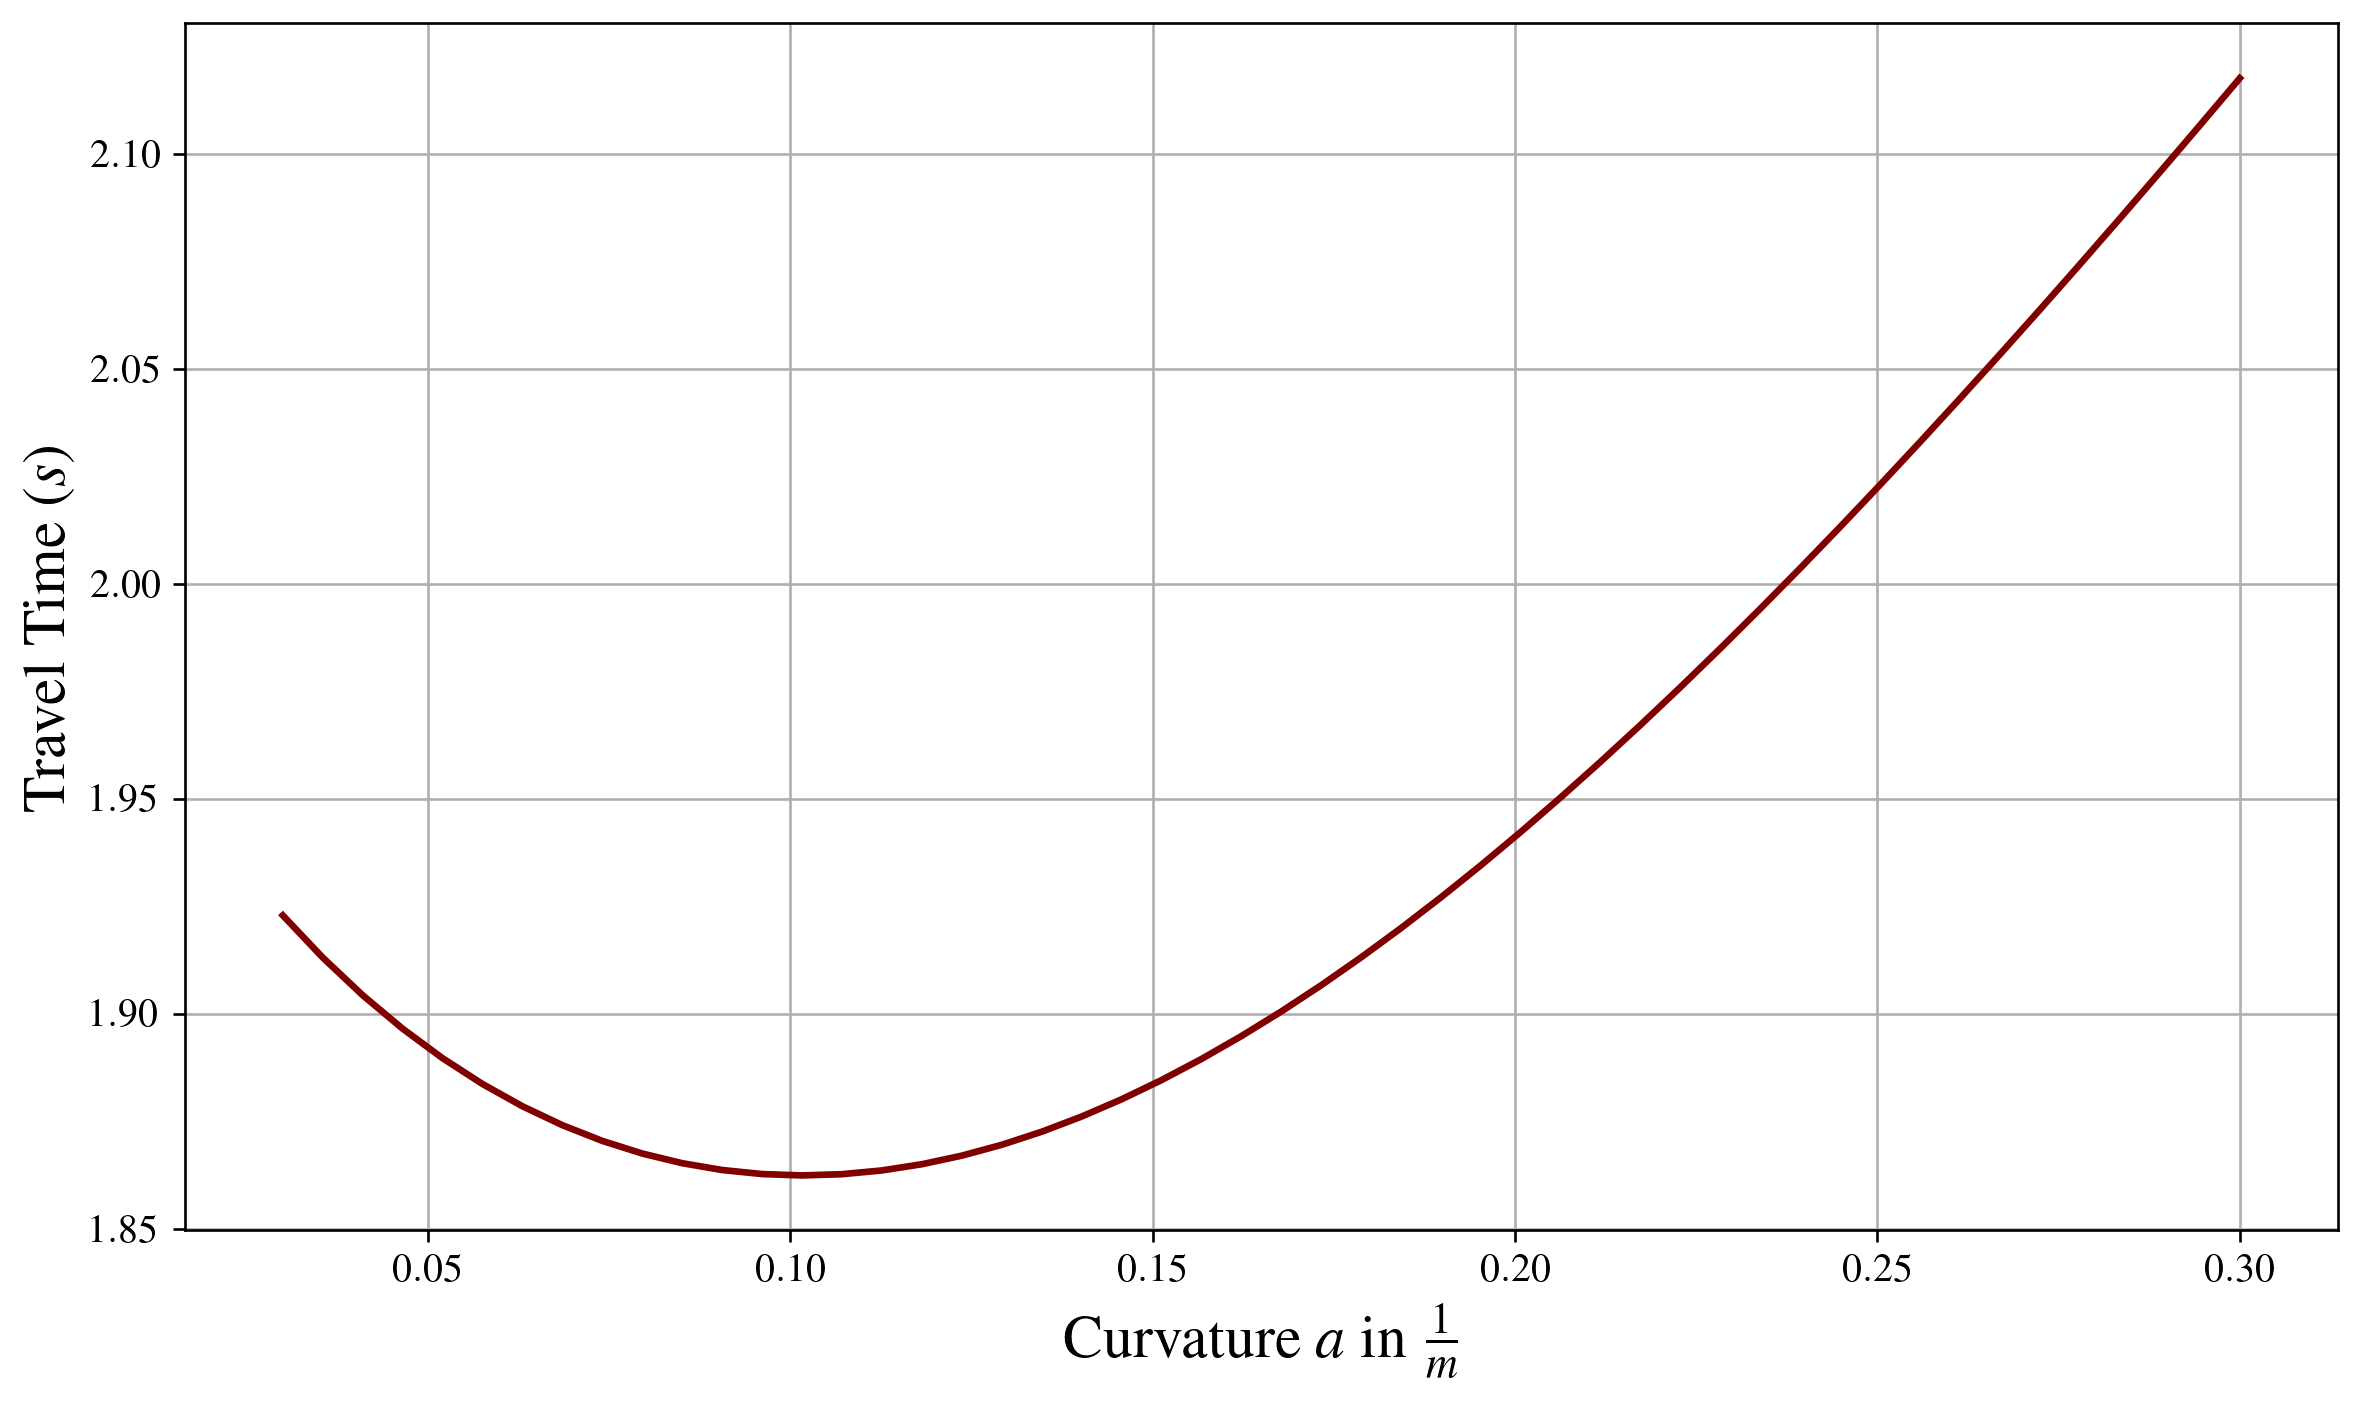

In [16]:
a_values = np.linspace(0.03, 0.3)
t_values = [get_t(a) for a in a_values]
plt.plot(a_values, t_values)
plt.xlabel(R'Curvature $a$ in $\frac{1}{m}$')
plt.ylabel('Travel Time ($s$)')
plt.show()

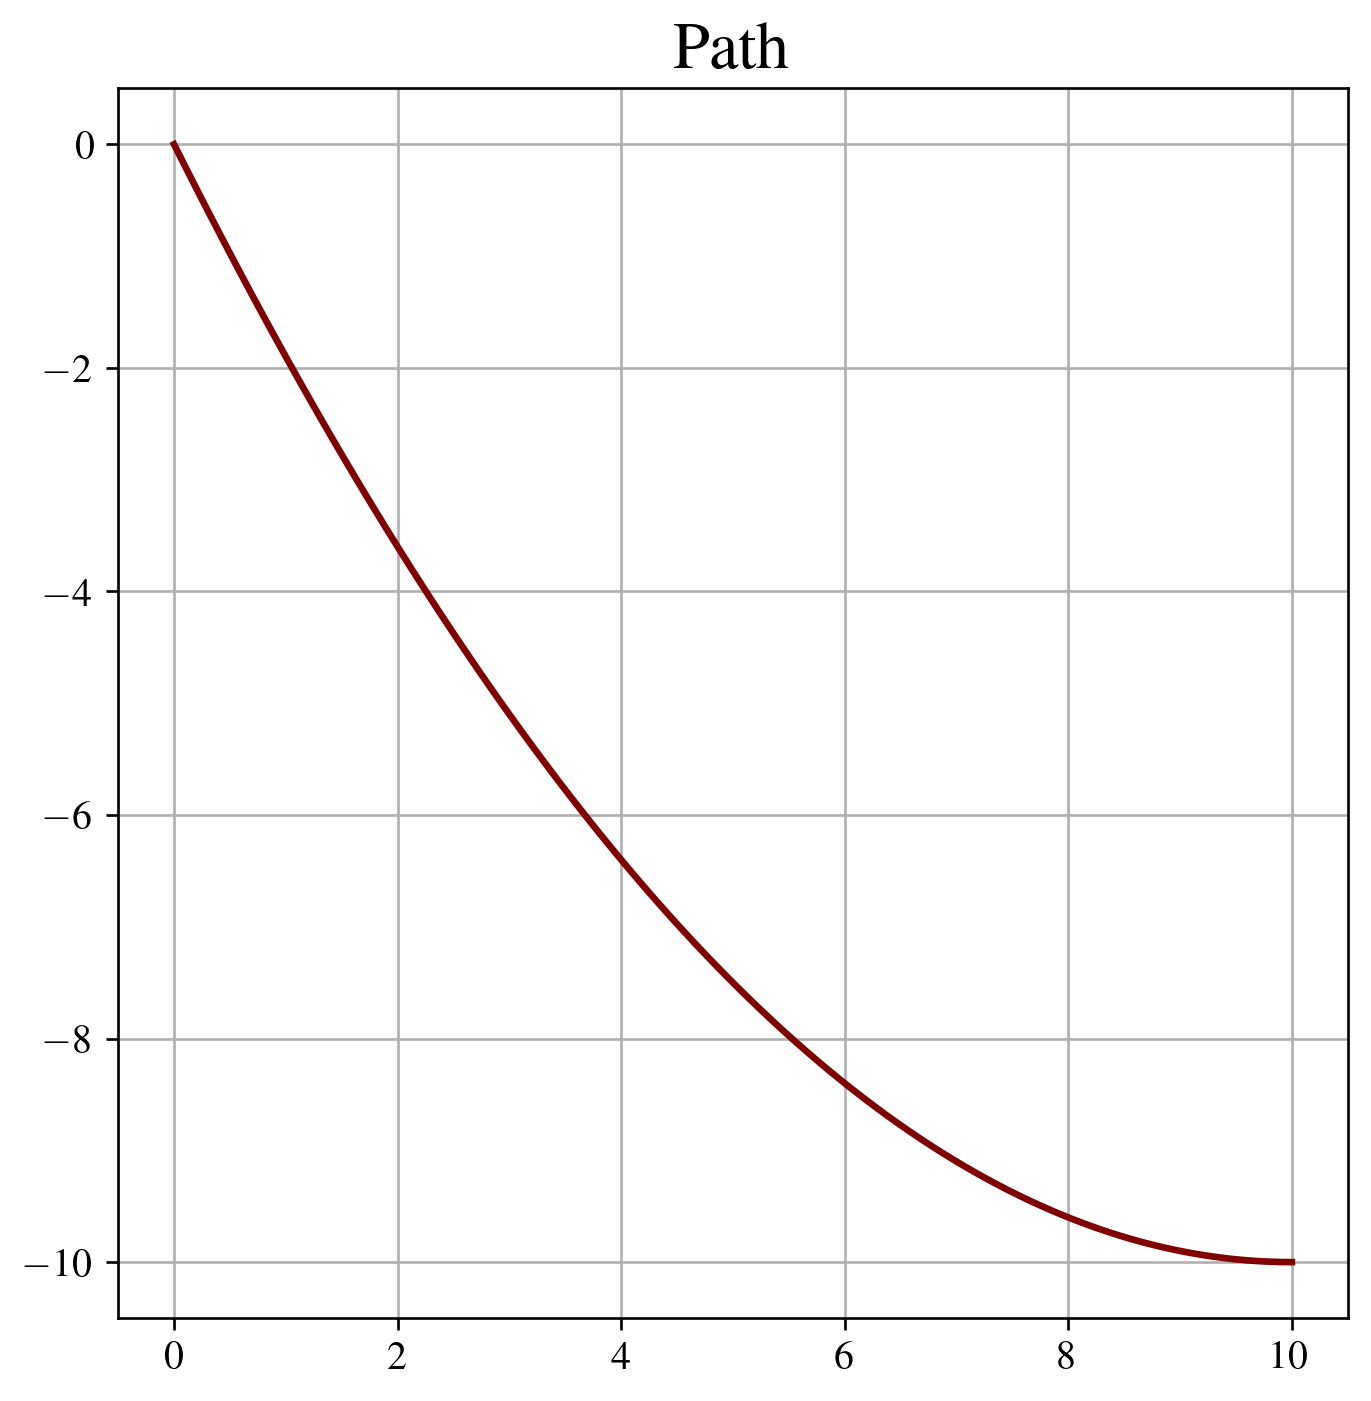

In [17]:
x = np.linspace(0, 10, 100)
y = 0.1*x**2 - 2*x
plt.plot(x, y)
plt.title('Path')
plt.gca().set_aspect('equal')
plt.show()

I am aware that this is probably not the method you expect and certainly don't like me using the `scipy` function, but I have over a 100% in the class and this is a loaded question. I am willing to sacrifice points for time, since I already have the A. I hope I get brownie points for having an intuitive understanding of what is going on though.